In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('figure', facecolor='w')

In [2]:
def read_sd(filename):
    return np.loadtxt(filename).T

def plot_sd_single(ax, filename):
    x, y = read_sd(filename)
    ax.plot(x, y, color='#1f77b4')

In [3]:
filenames = [
    'wB97X/HSA_wB97X_ElEmb_La_SD.dat',
    'wB97X/HSA_MM_MM_La_SD.dat',
    'wB97X/HSA_ANI-2x_EMLE_La_SD.dat',
    'wB97X/HSA_wB97X_ElEmb_Lb_SD.dat',
    'wB97X/HSA_MM_MM_Lb_SD.dat',
    'wB97X/HSA_ANI-2x_EMLE_Lb_SD.dat',
]

systems = ['wB97X/MM', 'MM', 'ANI-2x(EMLE)/MM']

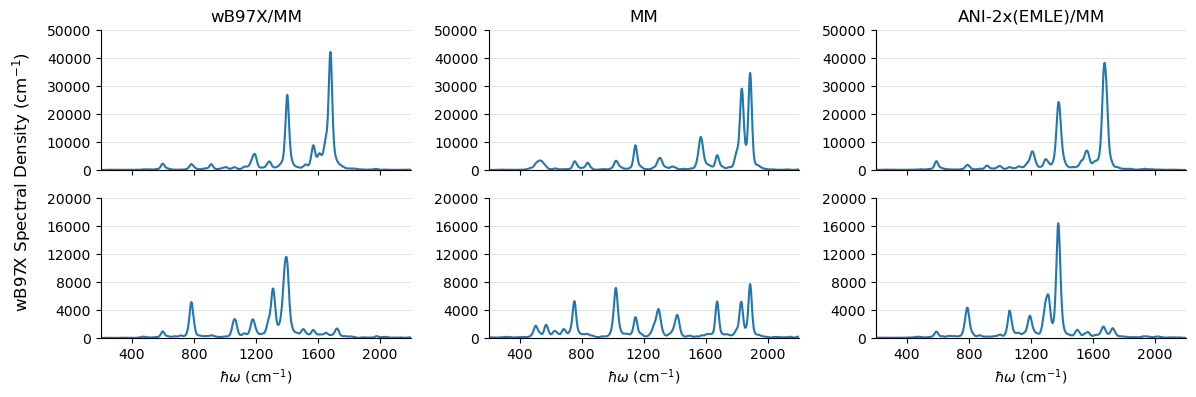

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(14, 4), sharex=True)
fig.subplots_adjust(wspace=0.25, hspace=0.2)

for i, (system, filename, ax) in enumerate(zip(systems * 2, filenames, axs.flatten())):
    plot_sd_single(ax, filename)
    ax.patch.set_alpha(0.)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim([200, 2200])
    
    if i < 3:
        ylim = [0, 50000]
        yticks = np.arange(0, 50001, 10000)
    else:
        ylim = [0, 20000]
        yticks = np.arange(0, 20001, 4000)
        
    if i > 3:
        ax.set_xticks(np.arange(400, 2001, 400))
        ax.set_xlabel('$\hbar \omega$ (cm$^{-1}$)')
    
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    for ytick in yticks:
        ax.axhline(ytick, linewidth=0.5, color='lightgrey', zorder=0)
    if i > 2:
        ax.set_xlabel('$\hbar \omega$ (cm$^{-1}$)')
    else:
        ax.set_title(system)
    
fig.text(0.06, 0.5, 'wB97X Spectral Density (cm$^{-1}$)', va='center', rotation='vertical', fontsize='large')
fig.savefig('FigS4.png', dpi=300, bbox_inches='tight')
plt.show()